# Regresion Logistica

### Función Logística Estándar

<img src="https://d1.awsstatic.com/sigmoid.bfc853980146c5868a496eafea4fb79907675f44.png" title="formula regresion logistica" />

import numpy as np

import matplotlib.pyplot as plt

import math

#### Creamos una función logística vectorial (ufuncs)
logistica = np.frompyfunc(lambda b0, b1, x:
                         1 / (1 + math.exp(-(b0 + b1*x))),
                         3, 1)

#### Graficamos la función logística
plt.figure(figsize=(8, 4))

#### Diferentes pendientes
plt.scatter(np.arange(-5, 5, 0.1),
           logistica(0, 1, np.arange(-5, 5, 0.1)),
           color="green")

plt.scatter(np.arange(-5, 5, 0.1),
           logistica(0, 2, np.arange(-5, 5, 0.1)),
           color="gold")

plt.scatter(np.arange(-5, 5, 0.1),
           logistica(0, 3, np.arange(-5, 5, 0.1)),
           color="red")

plt.title("Función Logística Estándar - Diferentes 'Pendientes'", fontsize=14.0)

plt.ylabel("Probabilidad", fontsize=13.0)

plt.xlabel("Valores", fontsize=13.0)

plt.show()

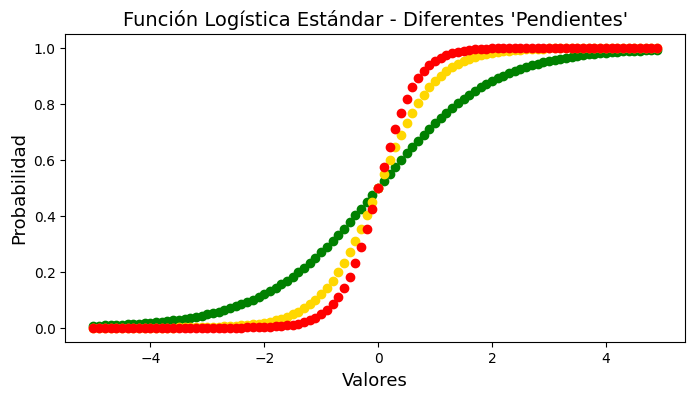

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import math

#### Creamos una función logística vectorial (ufuncs)
logistica = np.frompyfunc(lambda b0, b1, x:
                         1 / (1 + math.exp(-(b0 + b1*x))),
                         3, 1)

#### Graficamos la función logística
plt.figure(figsize=(8, 4))

#### Diferentes pendientes
plt.scatter(np.arange(-5, 5, 0.1),
           logistica(0, 1, np.arange(-5, 5, 0.1)),
           color="green")

plt.scatter(np.arange(-5, 5, 0.1),
           logistica(0, 2, np.arange(-5, 5, 0.1)),
           color="gold")

plt.scatter(np.arange(-5, 5, 0.1),
           logistica(0, 3, np.arange(-5, 5, 0.1)),
           color="red")

plt.title("Función Logística Estándar - Diferentes 'Pendientes'", fontsize=14.0)

plt.ylabel("Probabilidad", fontsize=13.0)

plt.xlabel("Valores", fontsize=13.0)

plt.show()

----
## Taquicardia: Probabilidad y Clase

#### Persona Normal de 60 a 100 latidos por minuto.
#### Persona con Taquicardia de hasta 220 latidos por minuto.
personas_normal = [65, 70, 80, 80, 80,
                   90, 95, 100, 105, 110]

personas_taquicardia = [105, 110, 110, 120, 120,
                        130, 140, 180, 185, 190]

#### Graficamos una función logística
plt.figure(figsize=(6, 4))

##### y = b0 + b1x    
#####
##### y = -46.68057196 + 0.42460226x

plt.scatter(np.arange(60, 200, 0.1), 
            logistica(-46.68057196, 0.42460226,
                      np.arange(60, 200, 0.1)))  

#### Graficamos la frecuencia cardíaca de las personas 
plt.scatter(personas_normal, [0]*10, 
            marker="o", c="green", s=250, label="Normal")
                
plt.scatter(personas_taquicardia, [1]*10, 
            marker="o", c="red", s=250, label="Taquicardia")    

#### Graficamos las probabilidades para tres (3) individuos
individuos = [80, 110, 180]

probalidades = logistica(-46.68057196, 0.42460226, individuos)

plt.scatter(individuos, probalidades,
            marker="*", c="darkorange", s=500)

plt.text(individuos[0]+7, 0.05, "%0.2f" % probalidades[0],
         size=12, color="black")
plt.text(individuos[1]+7, 0.48, "%0.2f" % probalidades[1],
         size=12, color="black")
plt.text(individuos[2]+7, 0.90, "%0.2f" % probalidades[2],
         size=12, color="black")
plt.text(0, 1, "TAQUICARDIA", size=12, color="red")

plt.text(0, 0, "NORMAL", size=12, color="red")

plt.ylabel("Probabilidad de Taquicardia", fontsize=13.0)

plt.xlabel("Frecuencia cardíaca (latidos por minuto)", fontsize=13.0)

plt.legend(bbox_to_anchor=(1, 0.2))

plt.show()

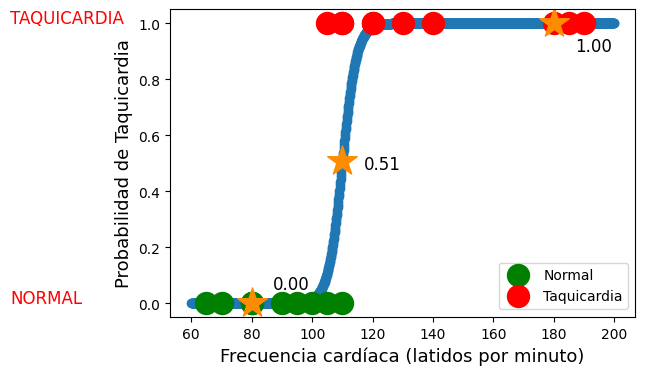

In [2]:
#### Persona Normal de 60 a 100 latidos por minuto.
#### Persona con Taquicardia de hasta 220 latidos por minuto.
personas_normal = [65, 70, 80, 80, 80,
                   90, 95, 100, 105, 110]

personas_taquicardia = [105, 110, 110, 120, 120,
                        130, 140, 180, 185, 190]

#### Graficamos una función logística
plt.figure(figsize=(6, 4))

##### y = b0 + b1x    
#####
##### y = -46.68057196 + 0.42460226x

plt.scatter(np.arange(60, 200, 0.1), 
            logistica(-46.68057196, 0.42460226,
                      np.arange(60, 200, 0.1)))  

#### Graficamos la frecuencia cardíaca de las personas 
plt.scatter(personas_normal, [0]*10, 
            marker="o", c="green", s=250, label="Normal")
                
plt.scatter(personas_taquicardia, [1]*10, 
            marker="o", c="red", s=250, label="Taquicardia")    

#### Graficamos las probabilidades para tres (3) individuos
individuos = [80, 110, 180]

probalidades = logistica(-46.68057196, 0.42460226, individuos)

plt.scatter(individuos, probalidades,
            marker="*", c="darkorange", s=500)

plt.text(individuos[0]+7, 0.05, "%0.2f" % probalidades[0],
         size=12, color="black")
plt.text(individuos[1]+7, 0.48, "%0.2f" % probalidades[1],
         size=12, color="black")
plt.text(individuos[2]+7, 0.90, "%0.2f" % probalidades[2],
         size=12, color="black")
plt.text(0, 1, "TAQUICARDIA", size=12, color="red")

plt.text(0, 0, "NORMAL", size=12, color="red")

plt.ylabel("Probabilidad de Taquicardia", fontsize=13.0)

plt.xlabel("Frecuencia cardíaca (latidos por minuto)", fontsize=13.0)

plt.legend(bbox_to_anchor=(1, 0.2))

plt.show()

----
## Máxima Verosimilitud

En estadística, la estimación por máxima verosimilitud (conocida también como EMV y, en ocasiones, MLE por sus siglas en inglés) es un método habitual para ajustar un modelo y estimar sus parámetros.

#### Diferentes funciones logísticas con diferentes "pendientes"

plt.figure(figsize=(6, 4))

for b1 in np.arange(0.35, 0.49, 0.025):
    plt.scatter(np.arange(60, 200, 0.1), 
                logistica(-46.68057196,
                          b1,
                          np.arange(60, 200, 0.1)),
                label="b_1=%0.2f" % b1)  
   
#### Graficamos la frecuencia cardíaca de las personas 
plt.scatter(personas_normal, [0]*10, 
            marker="o", c="green", s=250, label="Normal") 

plt.scatter(personas_taquicardia, [1]*10, 
            marker="o", c="red", s=250, label="Taquicardia")  


plt.title("Máxima Verosimilitud", fontsize=18.0)

plt.text(0, 1, "TAQUICARDIA", size=12, color="red")

plt.text(0, 0, "NORMAL", size=12, color="red")

plt.ylabel("Probabilidad de Taquicardia", fontsize=13.0)

plt.xlabel("Frecuencia cardíaca (latidos por minuto)", fontsize=13.0)

plt.legend(bbox_to_anchor=(1, 1))

plt.show()

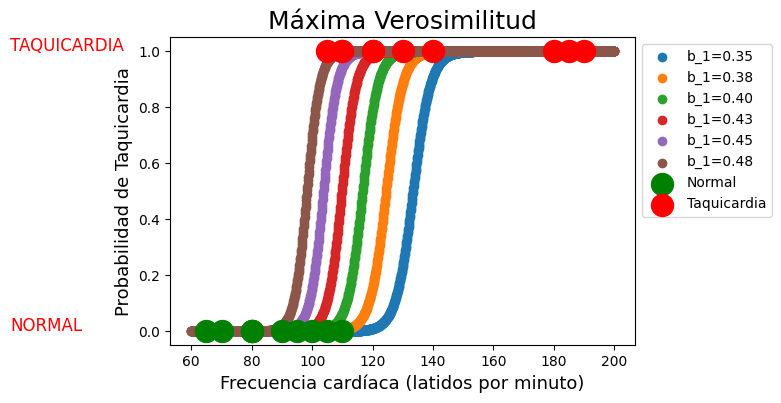

In [3]:
#### Diferentes funciones logísticas con diferentes "pendientes"

plt.figure(figsize=(6, 4))

for b1 in np.arange(0.35, 0.49, 0.025):
    plt.scatter(np.arange(60, 200, 0.1), 
                logistica(-46.68057196,
                          b1,
                          np.arange(60, 200, 0.1)),
                label="b_1=%0.2f" % b1)  
   
#### Graficamos la frecuencia cardíaca de las personas 
plt.scatter(personas_normal, [0]*10, 
            marker="o", c="green", s=250, label="Normal") 

plt.scatter(personas_taquicardia, [1]*10, 
            marker="o", c="red", s=250, label="Taquicardia")  


plt.title("Máxima Verosimilitud", fontsize=18.0)

plt.text(0, 1, "TAQUICARDIA", size=12, color="red")

plt.text(0, 0, "NORMAL", size=12, color="red")

plt.ylabel("Probabilidad de Taquicardia", fontsize=13.0)

plt.xlabel("Frecuencia cardíaca (latidos por minuto)", fontsize=13.0)

plt.legend(bbox_to_anchor=(1, 1))

plt.show()

----
## Modelo de Regresión Logística

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

frecuencias_cardiacas = [[65], [70], [80], [80], [80],
                         [90], [95], [100], [105], [110],
                         [105], [110], [110], [120], [120],
                         [130], [140], [180], [185], [190]]

clase = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

#### Creamos conjuntos de entrenamiento y de prueba del modelo
datos_entrena, datos_prueba, clase_entrena, clase_prueba = \
    train_test_split(frecuencias_cardiacas,
                     clase, 
                     test_size=0.30)

#### Creamos el modelo de Regresión Logística
modelo = LogisticRegression().fit(datos_entrena, clase_entrena)

np.set_printoptions(suppress=True)

print(modelo.predict(datos_prueba))

print(modelo.predict_proba(datos_prueba))

print(modelo.score(datos_prueba, clase_prueba))

print(modelo.intercept_, modelo.coef_)

In [4]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

frecuencias_cardiacas = [[65], [70], [80], [80], [80],
                         [90], [95], [100], [105], [110],
                         [105], [110], [110], [120], [120],
                         [130], [140], [180], [185], [190]]

clase = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

#### Creamos conjuntos de entrenamiento y de prueba del modelo
datos_entrena, datos_prueba, clase_entrena, clase_prueba = \
    train_test_split(frecuencias_cardiacas,
                     clase, 
                     test_size=0.30)

#### Creamos el modelo de Regresión Logística
modelo = LogisticRegression().fit(datos_entrena, clase_entrena)

np.set_printoptions(suppress=True)

print(modelo.predict(datos_prueba))

print(modelo.predict_proba(datos_prueba))

print(modelo.score(datos_prueba, clase_prueba))

print(modelo.intercept_, modelo.coef_)

[1 1 0 1 0 0]
[[0.07263877 0.92736123]
 [0.07263877 0.92736123]
 [0.99999363 0.00000637]
 [0.         1.        ]
 [0.99999995 0.00000005]
 [0.90804241 0.09195759]]
0.8333333333333334
[-50.65804372] [[0.4836808]]
